In [1]:
from glob import glob
from natsort import natsorted
import numpy as np

In [2]:
OUTPUT_DIR = "output/20231102144847/"

In [3]:
metrics_files = natsorted(glob(f"{OUTPUT_DIR}*/*/*/metrics.npz"))

In [4]:
metrics_files

['output/20231102144847/cnn/DCTPA/results/metrics.npz',
 'output/20231102144847/cnn/DCTPAUS/results/metrics.npz',
 'output/20231102144847/cnn/DCTUS/results/metrics.npz',
 'output/20231102144847/cnn/GLCMPA/results/metrics.npz',
 'output/20231102144847/cnn/GLCMPAUS/results/metrics.npz',
 'output/20231102144847/cnn/GLCMUS/results/metrics.npz',
 'output/20231102144847/cnn/GaborPA/results/metrics.npz',
 'output/20231102144847/cnn/GaborPAUS/results/metrics.npz',
 'output/20231102144847/cnn/GaborUS/results/metrics.npz',
 'output/20231102144847/cnn/PA/results/metrics.npz',
 'output/20231102144847/cnn/PAUS/results/metrics.npz',
 'output/20231102144847/cnn/US/results/metrics.npz',
 'output/20231102144847/densenet/DCTPA/results/metrics.npz',
 'output/20231102144847/densenet/DCTPAUS/results/metrics.npz',
 'output/20231102144847/densenet/DCTUS/results/metrics.npz',
 'output/20231102144847/densenet/GLCMPA/results/metrics.npz',
 'output/20231102144847/densenet/GLCMPAUS/results/metrics.npz',
 'output/

In [5]:
metrics = {}

for metrics_file in metrics_files:
    modality = metrics_file.split("/")[-3]
    model_name = metrics_file.split("/")[-4]
    
    saved_metrics = np.load(metrics_file)
    metrics[(modality, model_name)] = {"tpr":saved_metrics["tpr"], "fpr":saved_metrics["fpr"], "thresholds":saved_metrics["thresholds"], "roc_auc":saved_metrics["roc_auc"]}

In [6]:
metrics

{('DCTPA',
  'cnn'): {'tpr': array([0.        , 0.0052356 , 0.0104712 , 0.01570681, 0.02094241,
         0.02617801, 0.03141361, 0.03664921, 0.04188482, 0.04712042,
         0.04712042, 0.05235602, 0.05235602, 0.05759162, 0.05759162,
         0.05759162, 0.06282723, 0.06282723, 0.06806283, 0.07329843,
         0.07853403, 0.08376963, 0.08900524, 0.08900524, 0.09424084,
         0.09947644, 0.09947644, 0.09947644, 0.10471204, 0.10994764,
         0.11518325, 0.11518325, 0.12041885, 0.12041885, 0.12565445,
         0.13089005, 0.13612565, 0.14136126, 0.14136126, 0.14136126,
         0.14659686, 0.14659686, 0.15183246, 0.15183246, 0.15183246,
         0.15706806, 0.15706806, 0.15706806, 0.15706806, 0.16230366,
         0.16753927, 0.16753927, 0.16753927, 0.16753927, 0.16753927,
         0.16753927, 0.16753927, 0.16753927, 0.16753927, 0.17277487,
         0.17801047, 0.17801047, 0.18324607, 0.18324607, 0.18324607,
         0.18848168, 0.18848168, 0.18848168, 0.18848168, 0.19371728,
       

In [7]:
model_results = {}

for key in metrics.keys():
    _, model_name = key
    model_results[model_name] = {
        "fpr": [],
        "tpr": [],
        "thresholds": [],
        "roc_auc": [],
        "labels": [],
    }

In [8]:
model_results

{'cnn': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'densenet': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'svm': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'swin': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []}}

In [9]:
for key, saved_met_dict in metrics.items():
    modality, model_name = key
    
    label = f"{modality} - {model_name}"
    
    fpr = saved_met_dict["fpr"]
    tpr = saved_met_dict["tpr"]
    thresholds = saved_met_dict["thresholds"]
    roc_auc = saved_met_dict["roc_auc"]
    

    model_results[model_name]["fpr"].append(fpr)
    model_results[model_name]["tpr"].append(tpr)
    model_results[model_name]["thresholds"].append(thresholds)
    model_results[model_name]["roc_auc"].append(roc_auc)
    model_results[model_name]["labels"].append(label)

In [10]:
import matplotlib.pyplot as plt

def plot_curves(model_dict, model_name):
    labels = model_dict["labels"]
    fpr = model_dict["fpr"]
    tpr = model_dict["tpr"]
    roc_auc = model_dict["roc_auc"]

    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        linestyle = 'solid'
        if 'DCT' in labels[i]:
            linestyle = 'dashed'
        elif 'Gabor' in labels[i]:
            linestyle = 'dotted'
        plt.plot(fpr[i], tpr[i], linestyle=linestyle, label=f"{labels[i]} (area = {roc_auc[i]:0.2f})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
    plt.savefig('all_roc_curves.png')  # Save the combined ROC curves
    plt.show()  # Display the combined ROC curves

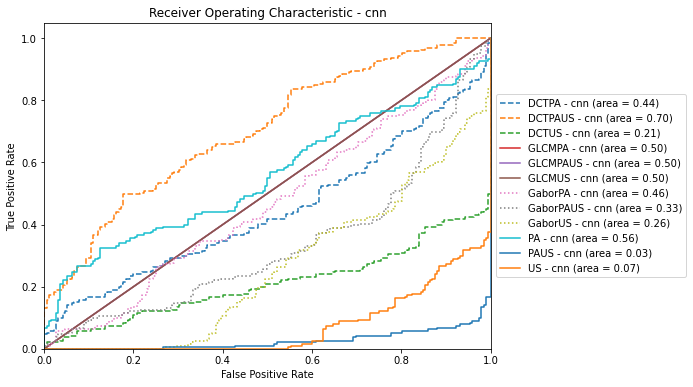

In [11]:
model_name = "cnn"
plot_curves(model_results[model_name], model_name)

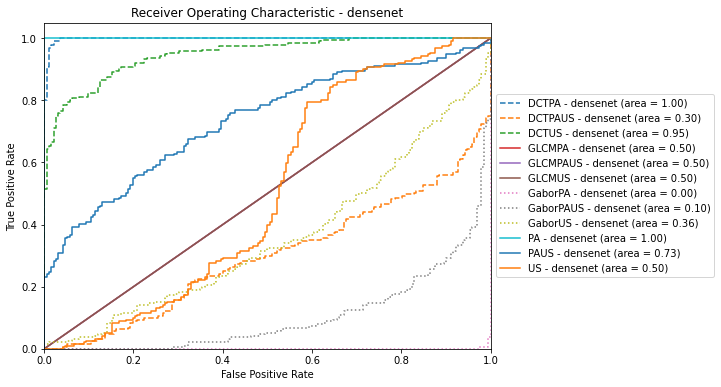

In [12]:
model_name = "densenet"
plot_curves(model_results[model_name], model_name)

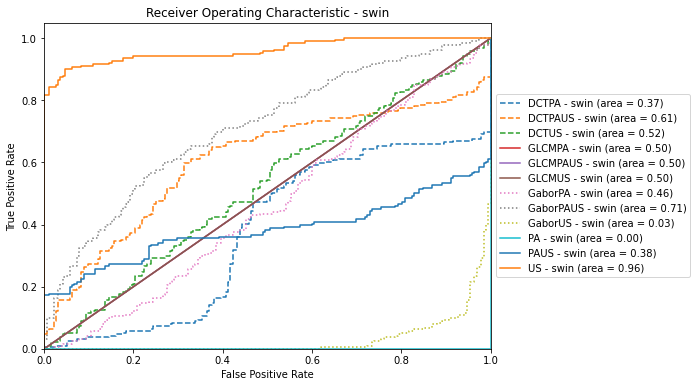

In [13]:
model_name = "swin"
plot_curves(model_results[model_name], model_name)

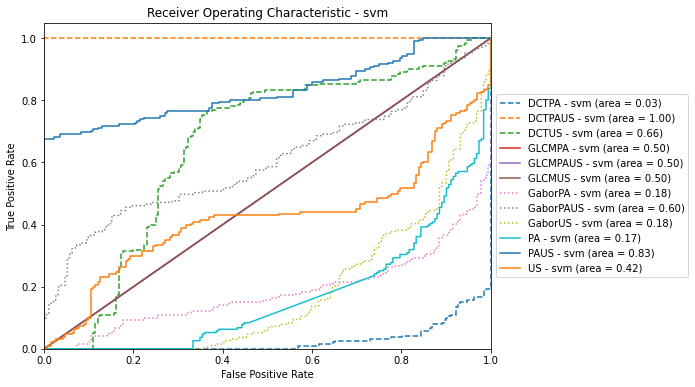

In [15]:
model_name = "svm"
plot_curves(model_results[model_name], model_name)

In [16]:
modality_results = {}

for key in metrics.keys():
    modality, _ = key
    modality_results[modality] = {
        "fpr": [],
        "tpr": [],
        "thresholds": [],
        "roc_auc": [],
        "labels": [],
    }

In [17]:
modality_results

{'DCTPA': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'DCTPAUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'DCTUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GLCMPA': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GLCMPAUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GLCMUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GaborPA': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GaborPAUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'GaborUS': {'fpr': [],
  'tpr': [],
  'thresholds': [],
  'roc_auc': [],
  'labels': []},
 'PA': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'PAUS': {'fpr': [], 'tpr': [], 'thresholds': [], 'roc_auc': [], 'labels': []},
 'US': {'fpr': [], 'tpr': 

In [18]:
for key, saved_met_dict in metrics.items():
    modality, model_name = key
    
    label = f"{modality} - {model_name}"
    
    fpr = saved_met_dict["fpr"]
    tpr = saved_met_dict["tpr"]
    thresholds = saved_met_dict["thresholds"]
    roc_auc = saved_met_dict["roc_auc"]
    

    modality_results[modality]["fpr"].append(fpr)
    modality_results[modality]["tpr"].append(tpr)
    modality_results[modality]["thresholds"].append(thresholds)
    modality_results[modality]["roc_auc"].append(roc_auc)
    modality_results[modality]["labels"].append(label)

In [19]:
modality_results

{'DCTPA': {'fpr': [array([0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.00520833, 0.00520833, 0.01041667, 0.01041667, 0.015625  ,
          0.02083333, 0.02083333, 0.02604167, 0.02604167, 0.02604167,
          0.02604167, 0.02604167, 0.02604167, 0.03125   , 0.03125   ,
          0.03125   , 0.03645833, 0.04166667, 0.04166667, 0.04166667,
          0.04166667, 0.046875  , 0.046875  , 0.05208333, 0.05208333,
          0.05208333, 0.05208333, 0.05208333, 0.05729167, 0.0625    ,
          0.0625    , 0.06770833, 0.06770833, 0.07291667, 0.078125  ,
          0.078125  , 0.08333333, 0.08854167, 0.09375   , 0.09375   ,
          0.09375   , 0.09895833, 0.10416667, 0.109375  , 0.11458333,
          0.11979167, 0.125     , 0.13020833, 0.13541667, 0.13541667,
          0.13541667, 0.140625  , 0.140625  , 0.14583333, 0.15104167,
          0.15104167, 0.15625   , 0.16145833, 0.16666667, 0.16666667,
    

In [20]:
def plot_modalities(modality_dict, model_name):
    labels = modality_dict["labels"]
    fpr = modality_dict["fpr"]
    tpr = modality_dict["tpr"]
    roc_auc = modality_dict["roc_auc"]

    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        linestyle = 'solid'
        if 'cnn' in labels[i]:
            linestyle = 'dashed'
        elif 'swin' in labels[i]:
            linestyle = 'dotted'
        elif 'svm' in labels[i]:
            linestyle = 'dashdot'
        plt.plot(fpr[i], tpr[i], linestyle=linestyle, label=f"{labels[i]} (area = {roc_auc[i]:0.2f})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Place the legend outside
    plt.savefig('all_roc_curves_modal.png')  # Save the combined ROC curves
    plt.show()  # Display the combined ROC curves

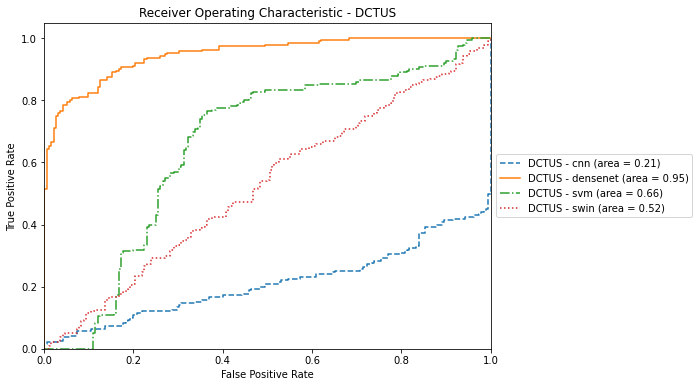

In [23]:
modality_name = "DCTUS"
plot_modalities(modality_results[modality_name], modality_name)

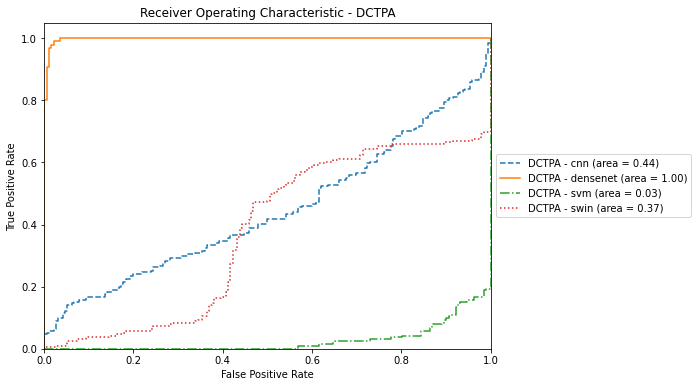

In [26]:
modality_name = "DCTPA"
plot_modalities(modality_results[modality_name], modality_name)

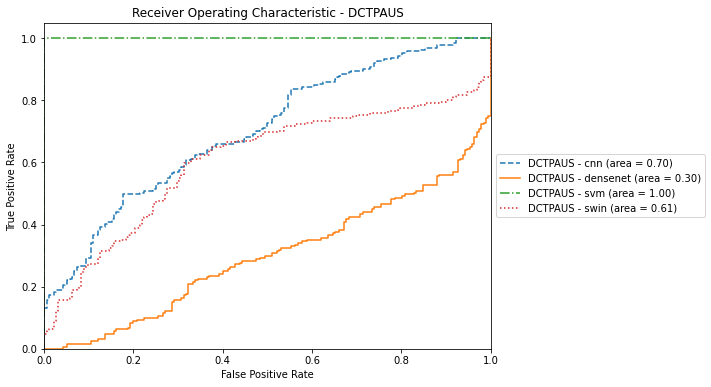

In [24]:
modality_name = "DCTPAUS"
plot_modalities(modality_results[modality_name], modality_name)

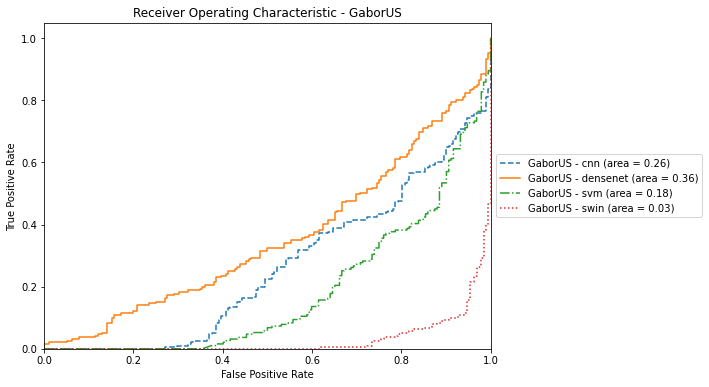

In [27]:
modality_name = "GaborUS"
plot_modalities(modality_results[modality_name], modality_name)

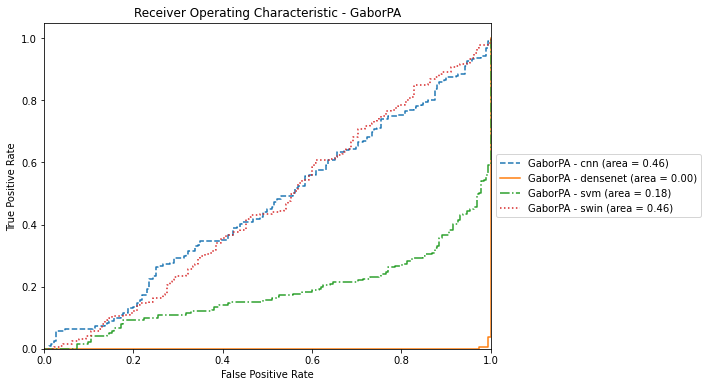

In [28]:
modality_name = "GaborPA"
plot_modalities(modality_results[modality_name], modality_name)

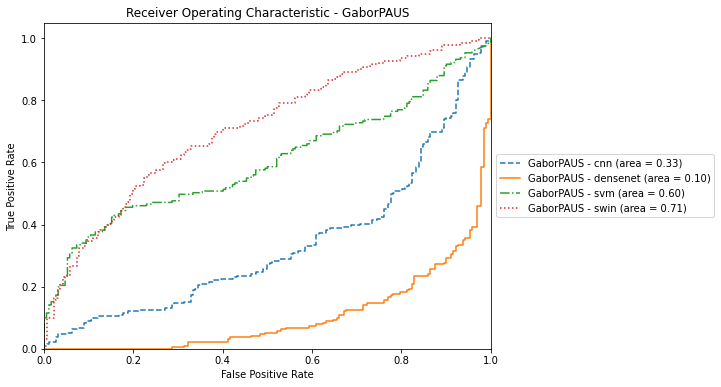

In [29]:
modality_name = "GaborPAUS"
plot_modalities(modality_results[modality_name], modality_name)

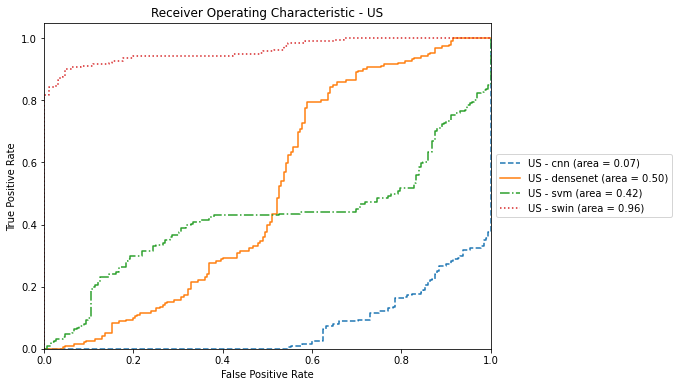

In [30]:
modality_name = "US"
plot_modalities(modality_results[modality_name], modality_name)

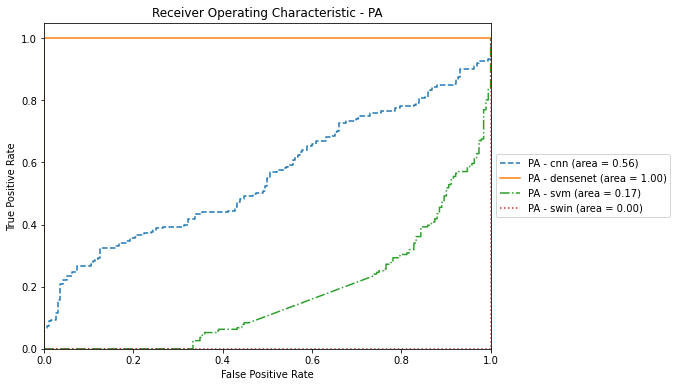

In [31]:
modality_name = "PA"
plot_modalities(modality_results[modality_name], modality_name)

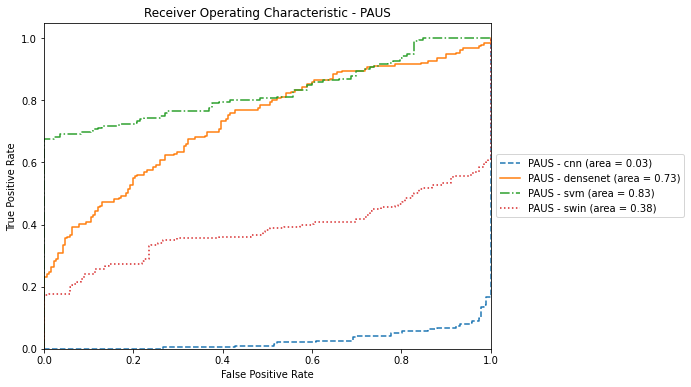

In [32]:
modality_name = "PAUS"
plot_modalities(modality_results[modality_name], modality_name)

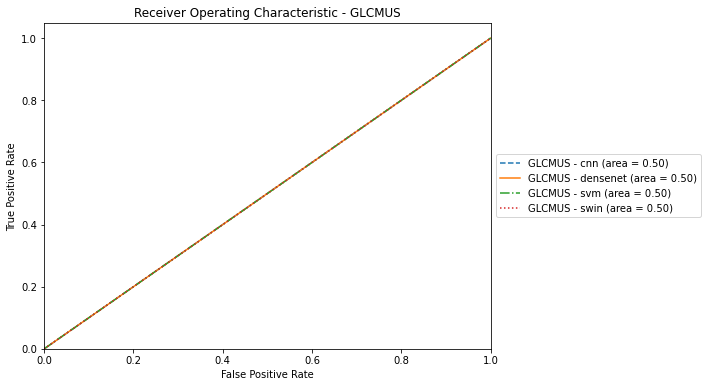

In [33]:
modality_name = "GLCMUS"
plot_modalities(modality_results[modality_name], modality_name)

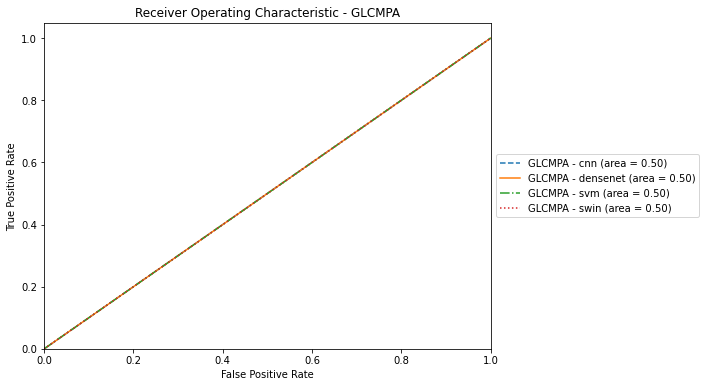

In [34]:
modality_name = "GLCMPA"
plot_modalities(modality_results[modality_name], modality_name)

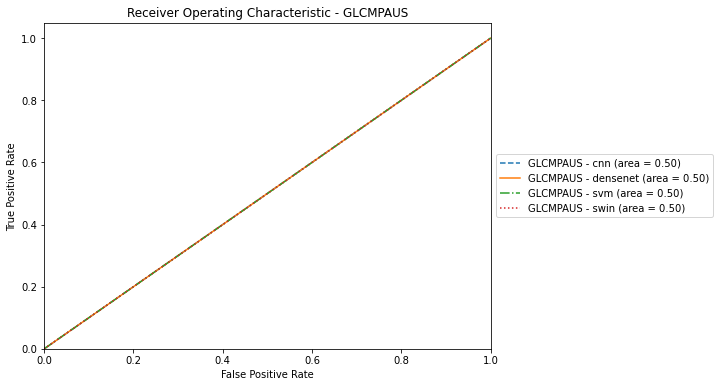

In [37]:
modality_name = "GLCMPAUS"
plot_modalities(modality_results[modality_name], modality_name)